In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as sm 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
credit = pd.read_csv('BankChurners.csv')

In [3]:
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
CLIENTNUM                                                                                                                             10127 non-null int64
Attrition_Flag                                                                                                                        10127 non-null object
Customer_Age                                                                                                                          10127 non-null int64
Gender                                                                                                                                10127 non-null object
Dependent_count                                                                                                                       10127 non-null int64
Education_Level                                                                                                   

In [5]:
credit.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)
credit.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)

In [6]:
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

Text(0.5, 0, 'Customer Age')

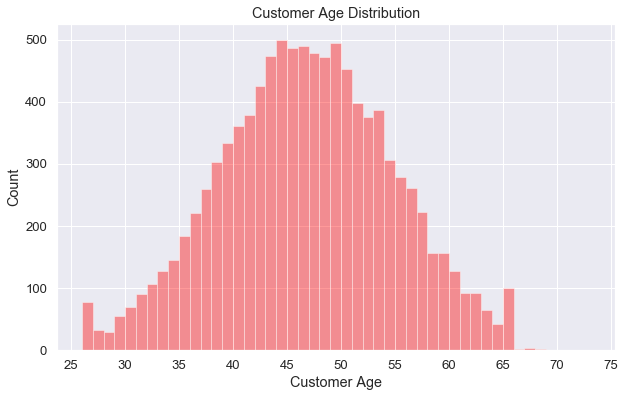

In [8]:
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Customer Age Distribution')
ax.set_xticks(range(15,80,5))

sns.distplot(credit['Customer_Age'], kde=False, ax=ax, color='red')
ax.set_ylabel('Count')
ax.set_xlabel('Customer Age')

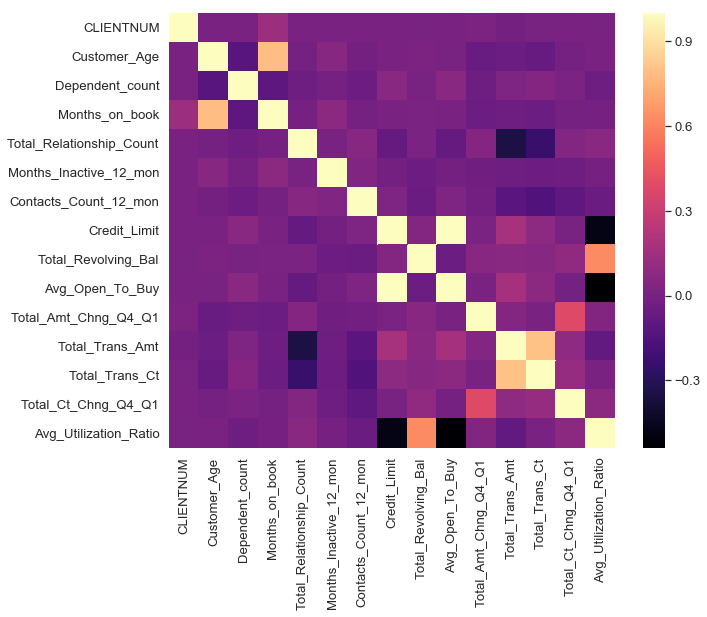

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(credit.corr(), cmap='magma', ax=ax)

In [10]:
def categorical(data):
    if data == 'Existing Customer':
        return 0
    else:
        return 1

In [11]:
credit['Attrition_Flag'] = credit['Attrition_Flag'].apply(categorical)

In [12]:
credit['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null int64
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int6

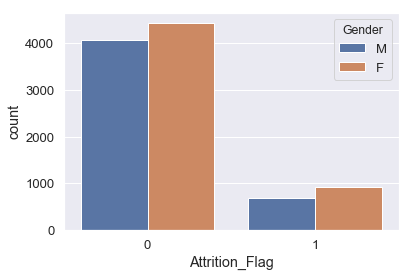

In [14]:
sns.countplot(x='Attrition_Flag', data=credit, hue='Gender')

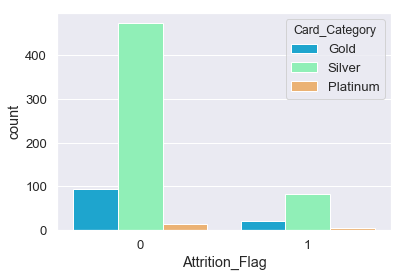

In [15]:
sns.countplot(x='Attrition_Flag', data=credit[credit['Card_Category'] != 'Blue'], hue='Card_Category', palette='rainbow')

In [16]:
credit['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Maybe do a little more EDA then try and make a preliminary model basic logistic regression. you can do it 

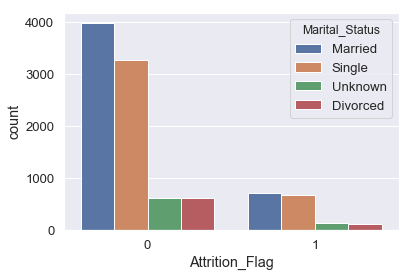

In [17]:
sns.countplot(x='Attrition_Flag', data=credit, hue='Marital_Status')

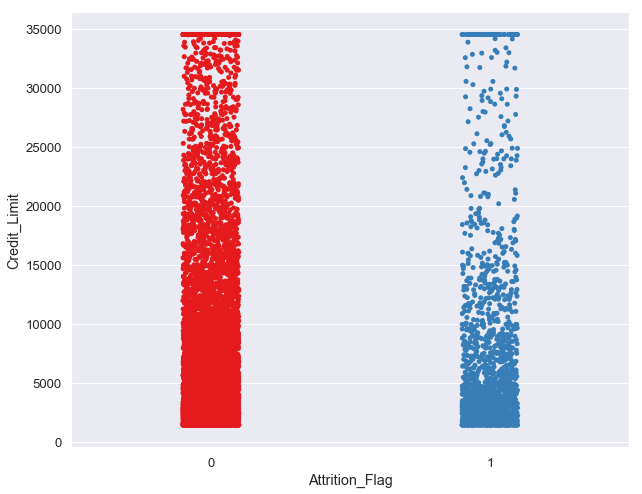

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

sns.stripplot(x='Attrition_Flag', y='Credit_Limit', data=credit, ax=ax, palette='Set1')

In [19]:
credit_raw = credit.copy()

In [20]:
credit.drop('CLIENTNUM', axis=1, inplace=True)

In [21]:
credit.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [22]:
credit['Gender'] = pd.Categorical(credit['Gender'])
credit['Education_Level'] = pd.Categorical(credit['Education_Level'])
credit['Marital_Status'] = pd.Categorical(credit['Marital_Status'])
credit['Income_Category'] = pd.Categorical(credit['Income_Category'])
credit['Card_Category'] = pd.Categorical(credit['Card_Category'])

In [23]:
credit = pd.get_dummies(credit, drop_first=True)
credit.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
X = credit.drop('Attrition_Flag', axis=1) 
y = credit['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

In [26]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.891 +/- 0.008


In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='blue', linestyle='-', linewidth=0.2)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [28]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid(c='blue', ls='-', lw=0.2) 
    plt.xscale('log')
    plt.legend(loc='lower right') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

<module 'matplotlib.pyplot' from 'C:\\Users\\Taha\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

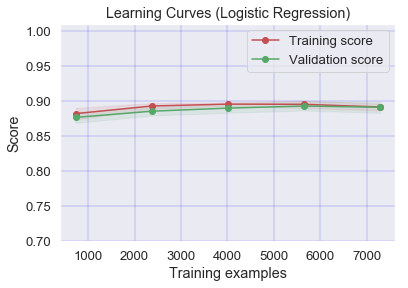

In [29]:
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

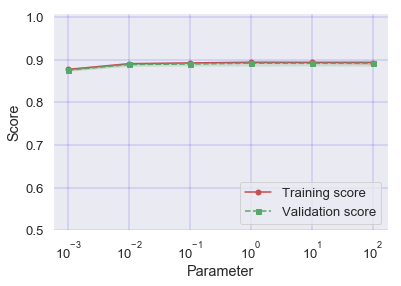

In [30]:
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,ylim=(0.5, 1.01), param_range=param_range)

In [31]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1644   51]
 [ 169  162]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1695
           1       0.76      0.49      0.60       331

   micro avg       0.89      0.89      0.89      2026
   macro avg       0.83      0.73      0.77      2026
weighted avg       0.88      0.89      0.88      2026



From the confusion matrix we can see that our model predicted 169 not leaving but they do leave. We must build on our model to lower this number and increase our accurary of 89% as well. 

In [32]:
credit = credit_raw

In [33]:
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [34]:
credit.drop('CLIENTNUM', axis=1, inplace=True)

In [35]:
rf = RandomForestClassifier(random_state=101).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[1676   19]
 [  92  239]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1695
           1       0.93      0.72      0.81       331

   micro avg       0.95      0.95      0.95      2026
   macro avg       0.94      0.86      0.89      2026
weighted avg       0.94      0.95      0.94      2026



In [36]:
cm = confusion_matrix(y_test, rf_pred)
print('Recall Score: %.3f' % (cm[0,0]/(cm[0,0]+cm[1,0])))
scores = cross_val_score(rf, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Recall Score: 0.948
CV accuracy: 0.943 +/- 0.009


By using a more complex method (Random Forest) to build our model we have found a better accurary score and our recall score has increased as well. Let's try some hyperparameter optimization to further work on our model.

In [37]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}
rf2 = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator = rf2, param_distributions = random_search, n_iter = 20, cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
rand_search.fit(X_train,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  1.4min remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'criterion': ['entropy', 'gini'], 'max_depth': [10, 142, 274, 406, 538, 671, 803, 935, 1067, 1200, None], 'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_leaf': [4, 6, 8, 12], 'min_samples_split': [5, 7, 10, 14], 'n_estimators': [151, 267, 384, 500, 617, 733, 850, 966, 1083, 1200]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn', sc

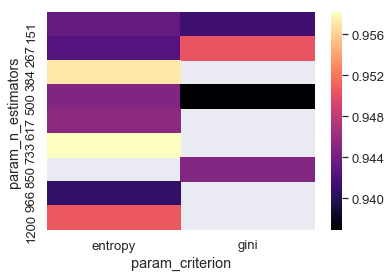

In [41]:
table = pd.pivot_table(pd.DataFrame(rand_search.cv_results_), values='mean_test_score', index='param_n_estimators', columns='param_criterion')
sns.heatmap(table, cmap='magma')

In [46]:
rand_pred = rand_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, rand_pred))
print(classification_report(y_test, rand_pred))
cm = confusion_matrix(y_test, rand_pred)
print('Recall Score: %.3f' % (cm[0,0]/(cm[0,0]+cm[1,0])))

[[1669   26]
 [  62  269]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1695
           1       0.91      0.81      0.86       331

   micro avg       0.96      0.96      0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Recall Score: 0.964


Random search on our Random Forest increased our Recall score and accurary, let's continue with a Grid search